## Problem Statement :

- To predict the churn of the customer and analyse the confusion matrix 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Import Data

In [2]:
data= pd.read_csv('churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data cleaning 

In [4]:
data= data.drop('RowNumber',axis=1)

In [5]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data=data.drop('CustomerId', axis=1)

In [8]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
data=data.drop('Surname',axis=1)

In [10]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Encoding

- Geography : dummy encoded as there is not inherent rank in the countires , hence dummy columns shall be created 
- Gender : dummy encoded as agaiin there is no inherent ranking of gender , label encoding shall create an inherent assumption of ranking between the genders 

In [12]:
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [13]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Data scaling

- Since there are columns with different unit of measurement such as Ages , credit scores , estimated salary and we dont have knowledge about the upper and the lower limits of the each column , hence we shall be performing standard scaling there by reducing the mean to 0 and unit variance in the respective columns of the data set .

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
# initialise the scaler 

scaler=StandardScaler()

In [17]:
# extracting the feature set before we scale the data 

X=data.drop('Exited', axis=1)



In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
# target data 

y=data['Exited']

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
# fitting the and transforming the feature data using the scaler

scaled_X=scaler.fit_transform(X)

In [23]:
scaled_X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [27]:
# converting the scaled data into the data frame for better understanding

X_sc=pd.DataFrame(data=scaled_X,columns=X.columns)

In [28]:
X_sc

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.578736,-0.573809,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.578736,-0.573809,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-0.578736,-0.573809,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.727904,-0.573809,0.912419


## Importing ML libraries 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Dynamic model implementation and evaluation using OOPS 


In [48]:
def modeling(X_sc,y):
    
    #splitting the data into training and testing 
    
    
    xtrain, xtest , ytrain ,ytest = train_test_split(X_sc,y,test_size=0.3, random_state=10)
    
    
    # implementing logistic regression 
    
    model1=LogisticRegression()
    
    model1=model1.fit(xtrain,ytrain)
    
    predict1=model1.predict(xtest)
    
    # evalute the model
    
    print('the confusion matrix for the Logistic Regression model  is :\n\n', confusion_matrix(ytest , predict1))
    
    print('the classification report for the Logistic Regression model  is :\n\n', classification_report(ytest , predict1))
    
    # implemeting SVC
    
    model2=SVC()
    
    model2=model2.fit(xtrain,ytrain)
    
    predict2=model2.predict(xtest)
    
    # evalute the model
    
    print('the confusion matrix for the Support Vector model is :\n\n', confusion_matrix(ytest , predict2))
    
    print('the classification report for the Support vector model  is :\n\n', classification_report(ytest , predict2))
    
    
    #implementing RFC
    
    model3=RandomForestClassifier()
    
    model3=model3.fit(xtrain,ytrain)
    
    predict3=model3.predict(xtest)
    
    # evalute the model
    
    print('the confusion matrix for the Random forest model is :\n\n', confusion_matrix(ytest , predict3))
    
    print('the classification report for the Random forest model  is :\n\n', classification_report(ytest , predict3))
    
    
    #implemeting KNN
    
    model4=KNeighborsClassifier()
    
    model4=model4.fit(xtrain,ytrain)
    
    predict4=model4.predict(xtest)
    
    # evalute the model
    
    print('the confusion matrix for the KNN model  is :\n\n', confusion_matrix(ytest , predict4))
    
    print('the classification report for the KNN model  is :\n\n', classification_report(ytest , predict4))
    
    

In [49]:
modeling(X_sc,y)

the confusion matrix for the Logistic Regression model  is :

 [[2278  102]
 [ 496  124]]
the classification report for the Logistic Regression model  is :

               precision    recall  f1-score   support

           0       0.82      0.96      0.88      2380
           1       0.55      0.20      0.29       620

    accuracy                           0.80      3000
   macro avg       0.68      0.58      0.59      3000
weighted avg       0.76      0.80      0.76      3000

the confusion matrix for the Support Vector model is :

 [[2319   61]
 [ 393  227]]
the classification report for the Support vector model  is :

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2380
           1       0.79      0.37      0.50       620

    accuracy                           0.85      3000
   macro avg       0.82      0.67      0.71      3000
weighted avg       0.84      0.85      0.83      3000

the confusion matrix for the Random fores

## Understanding the Confusion Matrix and performance metrics 

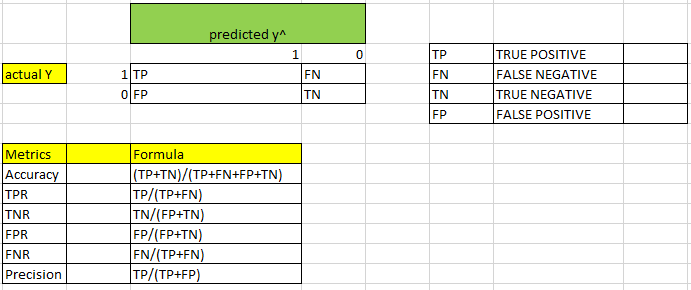